<a href="https://colab.research.google.com/github/pdpcosta/COVID-19_Brazil/blob/master/Python/COVID_19_Brazil_States.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Reading Brazilian data
urlbr='https://raw.githubusercontent.com/pdpcosta/COVID-19_Brazil/master/DATA/COVID-19_Brazil_CONF_DEATH.csv'
dfbr=pd.read_csv(urlbr)
#print(dfbr)
dfbr['Date']=pd.to_datetime(dfbr['Date'])
#df=df.astype({"Confirmed":int})
#print(dfbr.dtypes)
dfbr=dfbr.dropna()


# Identifying the Top 5 States in Number of Confirmed Cases


In [6]:
lastday=dfbr.Date.iloc[-1]
print(lastday)
topfivestates=dfbr[dfbr.Date==lastday].sort_values('Confirmed',ascending = False).head(5)
print ("Top 5 States in Number of Cases\n",topfivestates)


2020-06-07 00:00:00
Top 5 States in Number of Cases
          Region State       Date  Confirmed   Death
2703  Southeast    SP 2020-06-07   143073.0  9145.0
1975  Southeast    RJ 2020-06-07    67756.0  6707.0
623   Northeast    CE 2020-06-07    64271.0  3981.0
1455      North    PA 2020-06-07    54798.0  3714.0
311       North    AM 2020-06-07    49269.0  2250.0


# A Simple Graph of the Top 5 States in Confirmed Cases

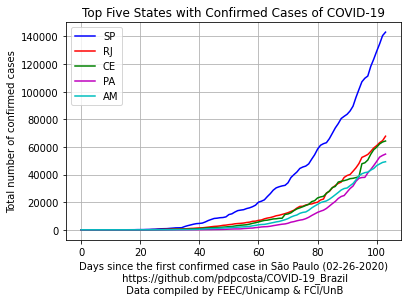

In [7]:
# SP was the first state with confirmed cases in Brazil, so it is used as a reference.
sp=dfbr[dfbr.State=="SP"]
days_sp=np.asarray(range(len(sp)))
sp_epidemy=sp[(sp['Confirmed']>0)]


n1state=topfivestates["State"].iloc[0]
n2state=topfivestates["State"].iloc[1]
n3state=topfivestates["State"].iloc[2]
n4state=topfivestates["State"].iloc[3]
n5state=topfivestates["State"].iloc[4]

confirmedn1=dfbr[(dfbr['State']==n1state)]
confirmedn2=dfbr[(dfbr['State']==n2state)]
confirmedn3=dfbr[(dfbr['State']==n3state)]
confirmedn4=dfbr[(dfbr['State']==n4state)]
confirmedn5=dfbr[(dfbr['State']==n5state)]
#print(n1state,n2state,n3state,n4state,n5state)

plt.title("Top Five States with Confirmed Cases of COVID-19")
plt.plot(days_sp,confirmedn1['Confirmed'],label=n1state,color="b") #Real data
plt.plot(days_sp,confirmedn2['Confirmed'],label=n2state,color="r") #Real data
plt.plot(days_sp,confirmedn3['Confirmed'],label=n3state,color="g") #Real data
plt.plot(days_sp,confirmedn4['Confirmed'],label=n4state,color="m") #Real data
plt.plot(days_sp,confirmedn5['Confirmed'],label=n5state,color="c") #Real data
plt.grid()
#plt.yscale('log')

plt.legend(loc="upper left")
plt.xlabel("Days since the first confirmed case in São Paulo (02-26-2020)\n https://github.com/pdpcosta/COVID-19_Brazil\n Data compiled by FEEC/Unicamp & FCI/UnB")
plt.ylabel("Total number of confirmed cases")
plt.show()

